# Signal Processing I - 1D Signals - SPI

Sun X, Wang X, Tang Z, Grivainis M, Kahler D, Yun C, Mita P, Fenyö D, Boeke JD: Transcription factor profiling reveals molecular choreography and key regulators of human retrotransposon expression, [Proc Natl Acad Sci U S A. 2018 Jun 12;115(24):E5526-E5535.](https://doi.org/10.1073/pnas.1722565115)

[Download data here](https://drive.google.com/drive/folders/1dT5AhSU9LfH_O_gLLZJPWY-9kxAnAsCJ?usp=sharing)

In [13]:
#Mount Google drive -- remove if using the notebook locally!!
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Import necessary packages
import sys,os
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

(-1.86729936729937, 17.355944055944025)

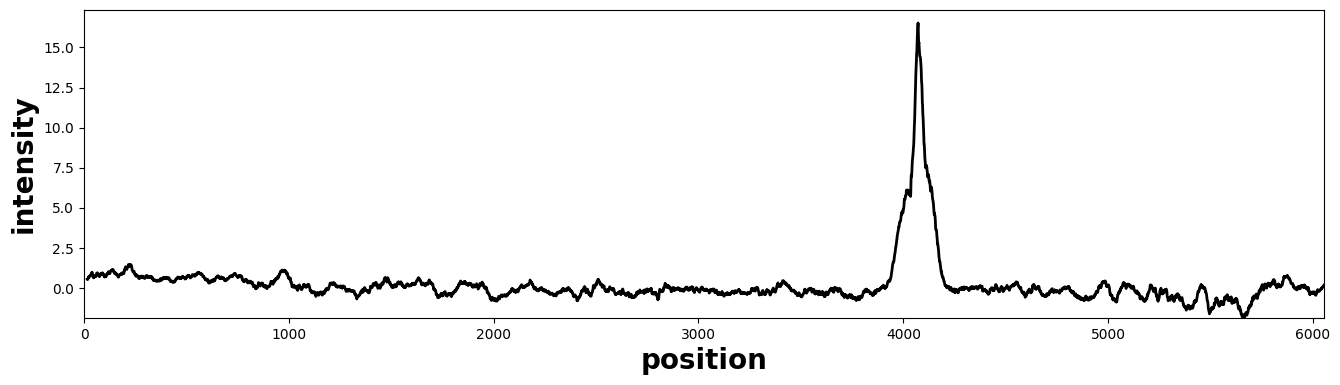

In [15]:
#Read in data and convert to series -- add path to where you copied the data into.
df=pd.read_csv('/content/drive/My Drive/Copy of SPI1-human_K562_ENCFF000QEG.txt',index_col=0, header=None, sep='\t')
#df
y=df.squeeze('columns') #Represent data as a series
#y
x=y.index #x here represents the index of the original data frame.
#x

fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1) #Setting x as the x-axis and y as the y-axis.
ax.set_xlim([0,np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

(0.0, 19.316608391608366)

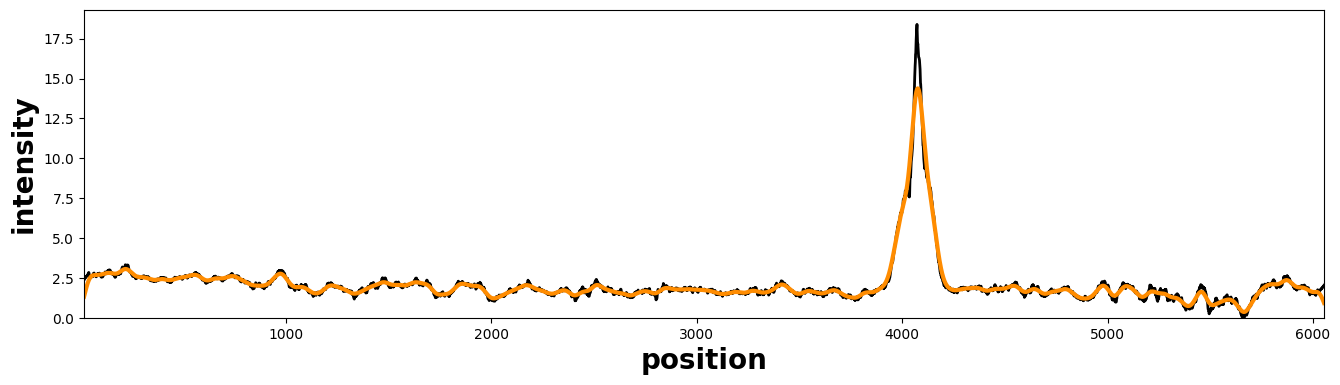

In [16]:
#Center data and smooth over 50 unit windows
y-=np.min(y)
width_smooth=50
w_smooth=np.hanning(2*width_smooth+1)
y_smooth=np.convolve(w_smooth/w_smooth.sum(),y,'same')
y_smooth

fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,y_smooth,color='darkorange',lw=3,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

(16.0, 6054.0)

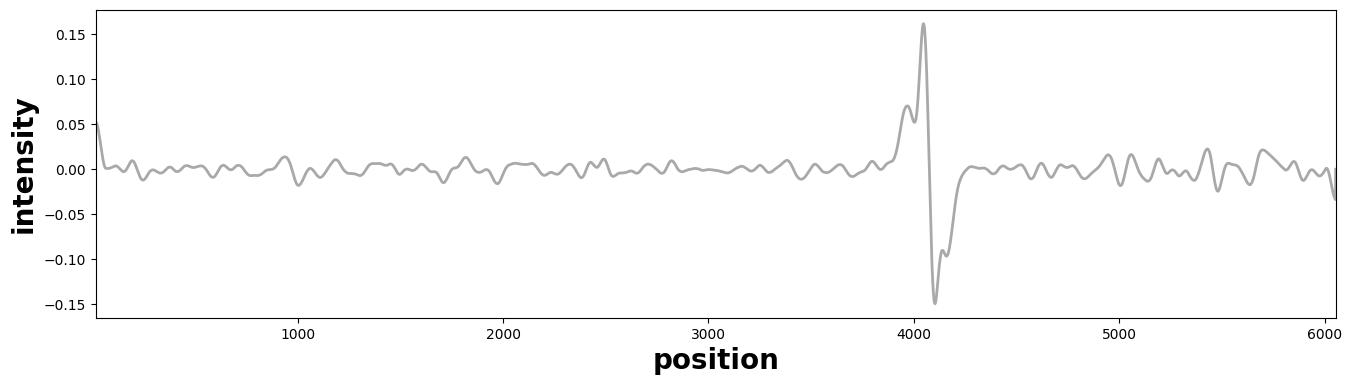

In [17]:
#Calculate the difference in smoothed data
y_diff=np.diff(y_smooth)
y_diff=np.append(y_diff,0)
#y_diff

#Plot the rate of change in intensity over windows
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y_diff,color='darkgray',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])

(0.0, 19.316608391608366)

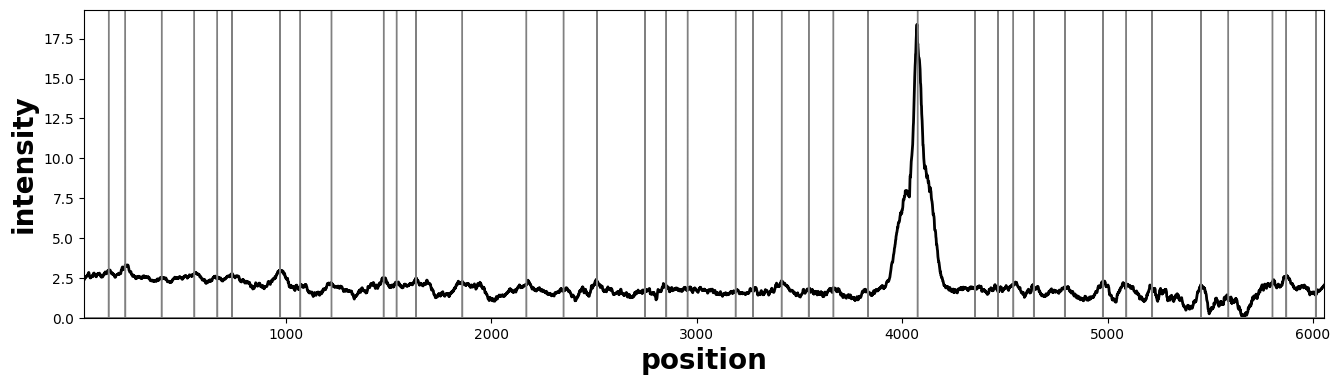

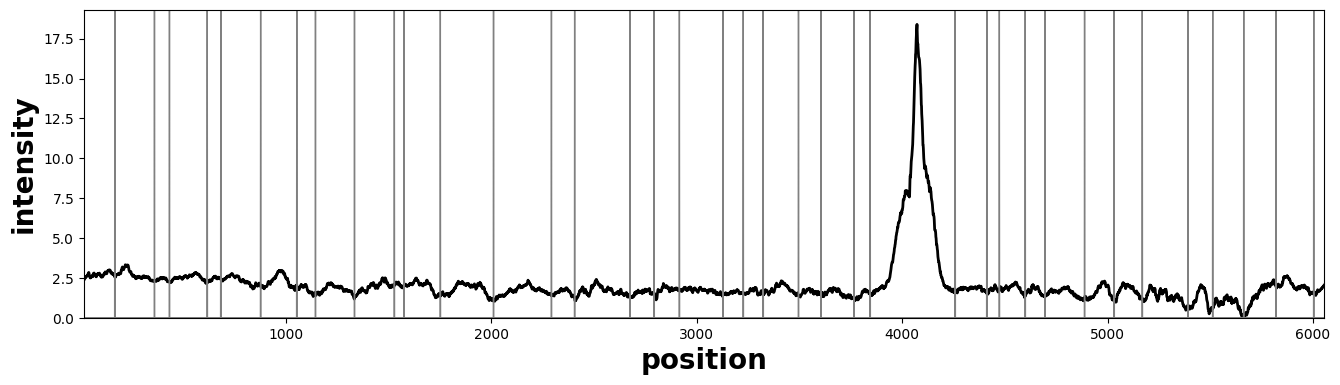

In [18]:
#Find regions in the data where the direction of change shifts

#Initialize a binary array of zeros with the same length as y_diff and set values to 1 where y_diff is positive
y_diff_bin=np.zeros(len(y_diff))
y_diff_bin[y_diff>0]=1
y_diff_bin_diff=np.diff(y_diff_bin)

#Detect transitions in direction - first by calculating discrete differences and then separate upward and downward shifts
y_diff_bin_diff=np.append(y_diff_bin_diff,0)
y_diff_bin_diff_max=y_diff_bin_diff.copy()
y_diff_bin_diff_min=y_diff_bin_diff.copy()
y_diff_bin_diff_max[y_diff_bin_diff>0]=0
y_diff_bin_diff_min[y_diff_bin_diff<0]=0

#Plot markers for the start of decreases
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,(-y_diff_bin_diff_max)*1.05*(np.max(y)-np.min(y))+np.min(y),color='gray',lw=1,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Plot markers for the start of increases
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,(y_diff_bin_diff_min)*1.05*(np.max(y)-np.min(y))+np.min(y),color='gray',lw=1,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])


(0.0, 3.1585178959975124)

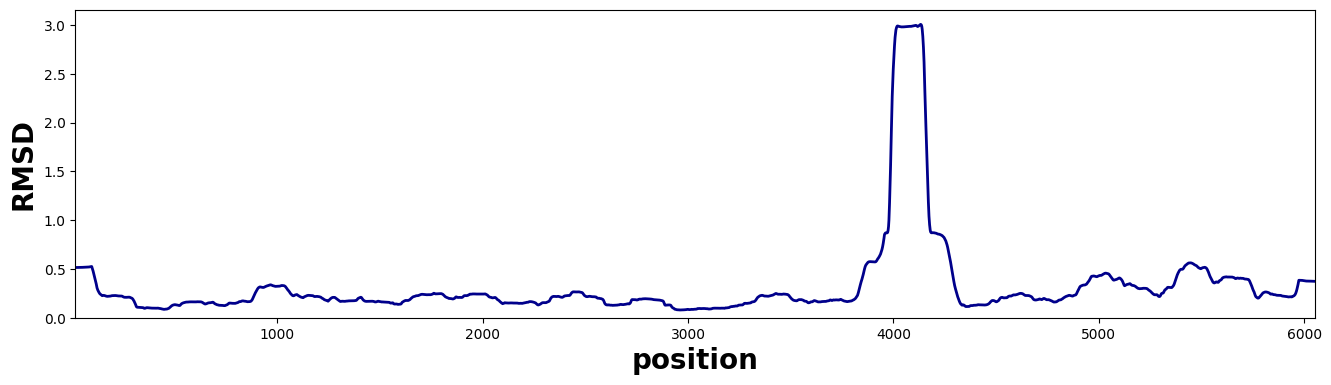

In [19]:
#Calculate and plot the root mean square deviation (RMSD) to assess variability around the smoothed average.
width_rmsd=80 #Define the window width for calculating RMSD
w_rmsd=np.ones(2*width_rmsd+1,'d') #Create a flat (uniform) window of weights
y_avg=np.convolve(w_rmsd/w_rmsd.sum(),y,'same') #Compute the moving average of y

#Calculate the mean square deviation (MSD)
y_sd=(y-y_avg)**2
y_msd=np.convolve(w_rmsd/w_rmsd.sum(),y_sd,'same')
y_rmsd=y_msd**0.5

#Plot the RMSD
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('RMSD',fontsize=20, fontweight='bold')
ax.plot(x,y_rmsd,color='darkblue',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([0,1.05*np.max(y_rmsd)])

(0.0, 19.316608391608366)

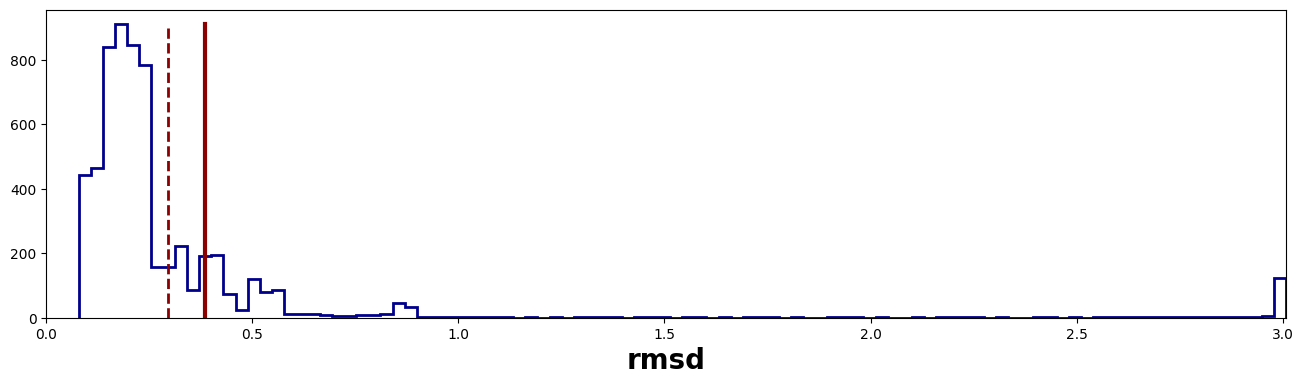

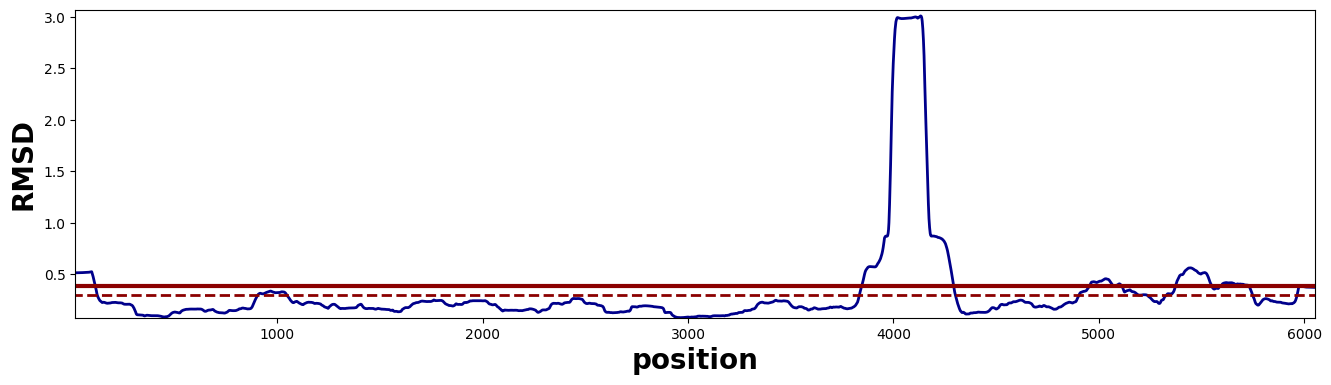

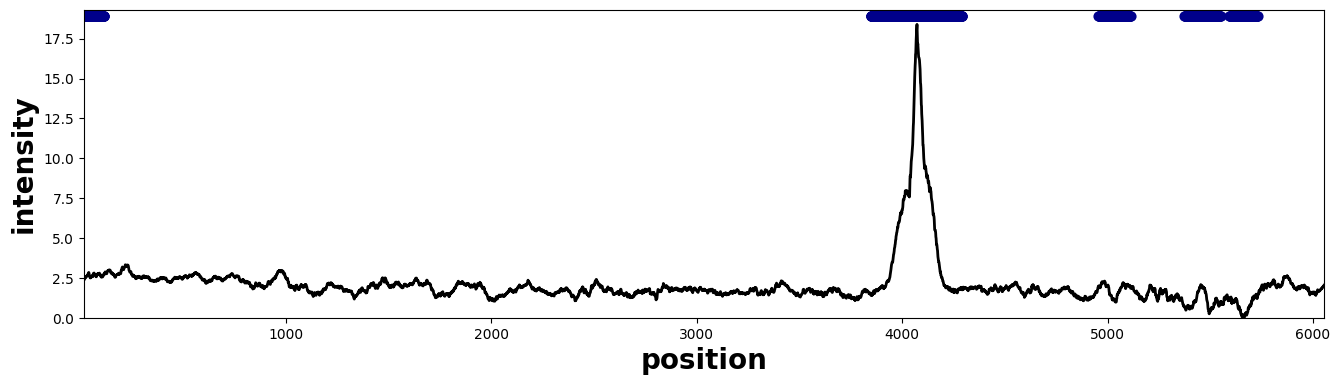

In [20]:
#Identify and highlight significant peaks or areas of variability
#Define threshold for RMSD
rmsd_th=1.3

#Plot Histogram of RMSD Values
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('rmsd',fontsize=20, fontweight='bold')
n, bins, patches = ax.hist(y_rmsd,color='darkblue',bins=100,lw=2,alpha=1,histtype='step')
ax.set_xlim([0,np.max(bins)])
max_val=np.max(n)
th=0.2
th_=0.1
th_i=0
max_i=len(n)
done=0

#Find the RMSD level threshold
for i in range(len(n)):
  if done==0:
    if max_val==n[i]:
      max_i=i
    if i>max_i:
      if max_val*th_>n[i]:
        done=1
    if max_val*th<n[i]:
      th_i=i+1

#Calculate and plot the RMSD Level
rmsd_level=bins[th_i]
rmsd_mean=np.mean(y_rmsd[y_rmsd<=rmsd_level])
rmsd_std=np.std(y_rmsd[y_rmsd<=rmsd_level])
rmsd_level=rmsd_mean+rmsd_std*(-2*np.log(th))**0.5
ax.plot([rmsd_level,rmsd_level],[0,max_val],color='darkred',lw=2,ls='--',alpha=1)
ax.plot([rmsd_level*rmsd_th,rmsd_level*rmsd_th],[0,max_val],color='darkred',lw=3,alpha=1)

#Plot RMSD with threshold lines
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('RMSD',fontsize=20, fontweight='bold')
ax.plot(x,y_rmsd,color='darkblue',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y_rmsd),1.02*np.max(y_rmsd)])
ax.plot([0,np.max(x)],[rmsd_level,rmsd_level],color='darkred',lw=2,ls='--',alpha=1)
ax.plot([0,np.max(x)],[rmsd_level*rmsd_th,rmsd_level*rmsd_th],color='darkred',lw=3,alpha=1)

#Highlight regions with high RMSD in the original plot
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.scatter(x[y_rmsd>=rmsd_level*rmsd_th],np.ones(len(x[y_rmsd>=rmsd_level*rmsd_th]))*1.03*np.max(y),color='darkblue',s=40,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

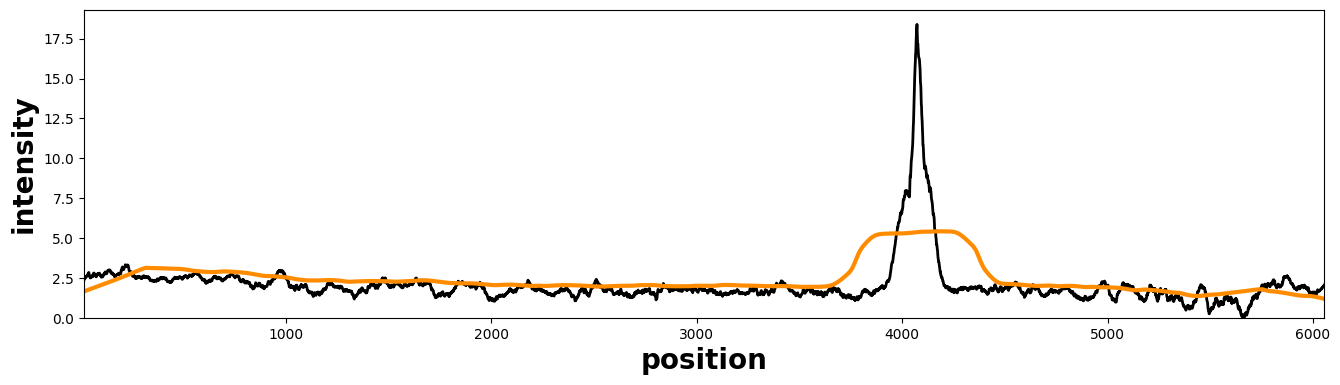

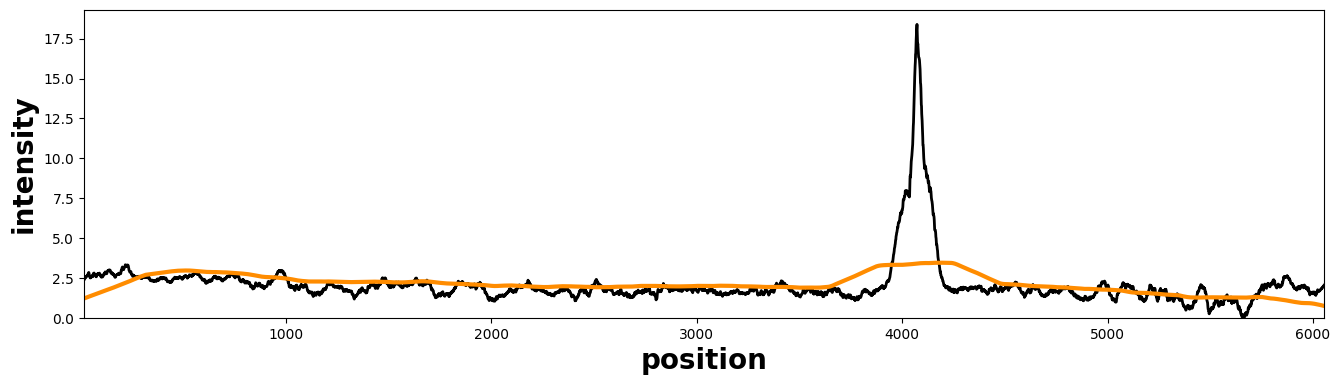

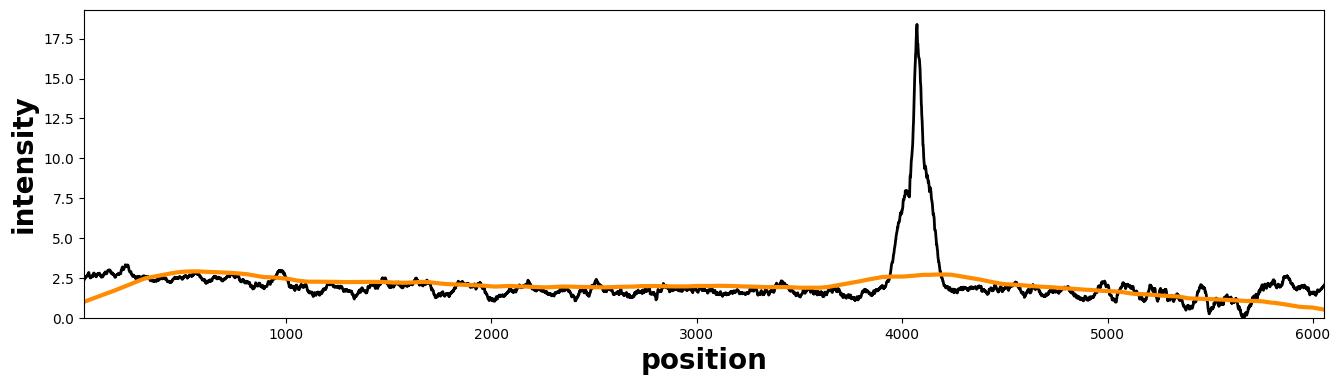

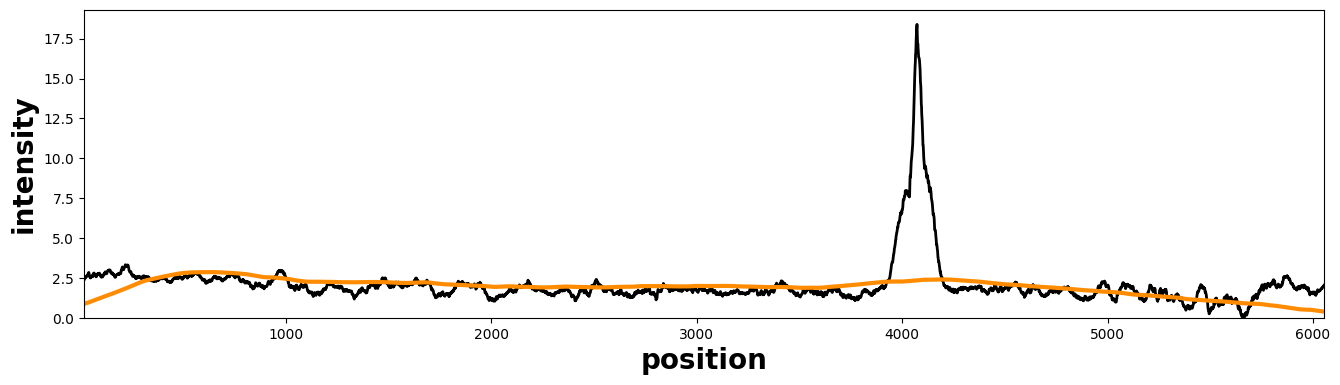

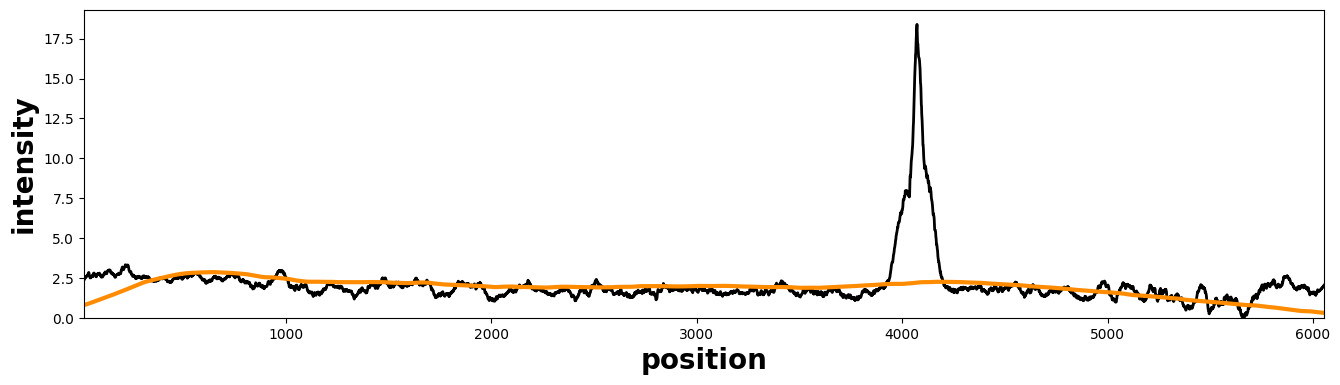

In [21]:
#Define background smoothing parameters
width_bgr=300
w_bgr=np.ones(2*width_bgr+1,'d')
th_bgr=1.2
y1 = y.copy()

#Iterative smoothing and background adjustment and plotting
for j in range(5):
  y_bgr=np.convolve(w_bgr/w_bgr.sum(),y1,'same')
  y1 = y.copy()
  y1[y1>th_bgr*y_bgr]=y_bgr[y1>th_bgr*y_bgr]

  fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
  ax.set_xlabel('position',fontsize=20, fontweight='bold')
  ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
  ax.plot(x,y,color='black',lw=2,alpha=1)
  ax.plot(x,th_bgr*y_bgr,color='darkorange',lw=3,alpha=1)
  ax.set_xlim([np.min(x),np.max(x)])
  ax.set_ylim([np.min(y),1.05*np.max(y)])

#Final background level adjustment
y_bgr = th_bgr*y_bgr

In [22]:
#Identify peaks
#Initialization - set peak width threshold and initialize a list to store peaks
peak_width_threshold=0.25
peaklist=[]

#Loop through all data points
for i in range(len(x)):
	i_=i
	if y_diff_bin_diff[i]==-1:
		peak_pos=x[i]
		peak_height=y[x[i]]
		signal_to_noise=0
		done=0

		#Determine left and right boundaries of the peak
		for j in range(width_rmsd):
			if i-j>=0:
				if y[x[i-j]]<peak_height/2.0:
					done=1
				if y_diff_bin_diff[i-j]==1:
					done=1
				if done==0:
					if peak_height<y[x[i-j]]:
						peak_height=y[x[i-j]]
						peak_pos=x[i-j]
						i_=i-j
		done=0
		for j in range(width_rmsd):
			if i+j<len(x):
				if y[x[i+j]]<peak_height/2.0:
					done=1
				if y_diff_bin_diff[i+j]==1:
					done=1
				if done==0:
					if peak_height<y[x[i+j]]:
						peak_height==y[x[i+j]]
						peak_pos=x[i+j]
						i_=i+j
		i_min_minus=0
		done=0
		for j in range(width_rmsd*5):
			if i_-j>=0:
				if y_diff_bin_diff[i_-j]==1:
					done=1
				if done==0:
					i_min_minus=j
		i_min_plus=0
		done=0
		for j in range(width_rmsd*5):
			if i_+j<len(x):
				if y_diff_bin_diff[i_+j]==1:
					done=1
				if done==0:
					i_min_plus=j

		#Compute local background (Baseline)
		local_bgr=(y[x[i_-i_min_minus]]+y[x[i_+i_min_plus]])/2.0
		peak_minus=-1
		i_peak_minus=0
		done=0
		for j in range(i_min_minus):
			if i_-j>=0:
				if (y[x[i_-j]]-local_bgr)<(peak_height-local_bgr)*peak_width_threshold:
					done=1
				if done==0:
					peak_minus=x[i_-j]
					i_peak_minus=j
		peak_plus=-1
		i_peak_plus=0
		done=0
		for j in range(i_min_plus):
			if i_+j<len(x):
				if (y[x[i_+j]]-local_bgr)<(peak_height-local_bgr)*peak_width_threshold:
					done=1
				if done==0:
					peak_plus=x[i_+j]
					i_peak_plus=j
		avg=y[x[i_]]
		avg_count=1
		for j in range(i_peak_minus):
			if i_-1-j>=0:
				avg+=y[x[i_-1-j]]
				avg_count+=1
		for j in range(i_peak_plus):
			if i_+1+j<len(x):
				avg+=y[x[i_+1+j]]
				avg_count+=1
		avg/=avg_count
		rmsd=(y[x[i_]]-avg)**2
		rmsd_count=1
		for j in range(i_peak_minus):
			if i_-1-j>=0:
				rmsd+=(y[x[i_-1-j]]-avg)**2
				rmsd_count+=1
		for j in range(i_peak_plus):
			if i_+1+j<len(x):
				rmsd+=(y[x[i_+1+j]]-avg)**2
				rmsd_count+=1
		rmsd/=rmsd_count
		rmsd=rmsd**0.5
		signal_to_noise=rmsd/rmsd_level
		if signal_to_noise>rmsd_th and peak_height>y_bgr[np.where(x == peak_pos)]:
			peaklist.append((peak_pos,peak_minus,peak_plus,peak_plus-peak_minus,peak_height,avg,local_bgr,signal_to_noise))
print('pos\twhm-\twhm+\tdelta\theight\tavg\tbgr\tsig_to_noise\n')
for (pos,minus,plus,delta,height,avg,bgr,sig_to_noise) in peaklist:
	print(str(pos)+'\t'+str(minus)+'\t'+str(plus)+'\t'+str(delta)+'\t'+str(height)+'\t'+str(avg)+'\t'+str(bgr)+'\t'+str(sig_to_noise)+'\n')

pos	whm-	whm+	delta	height	avg	bgr	sig_to_noise

4072	3981	4157	176	18.39676989676987	9.948874101416482	1.615134865134868	11.924013597932248



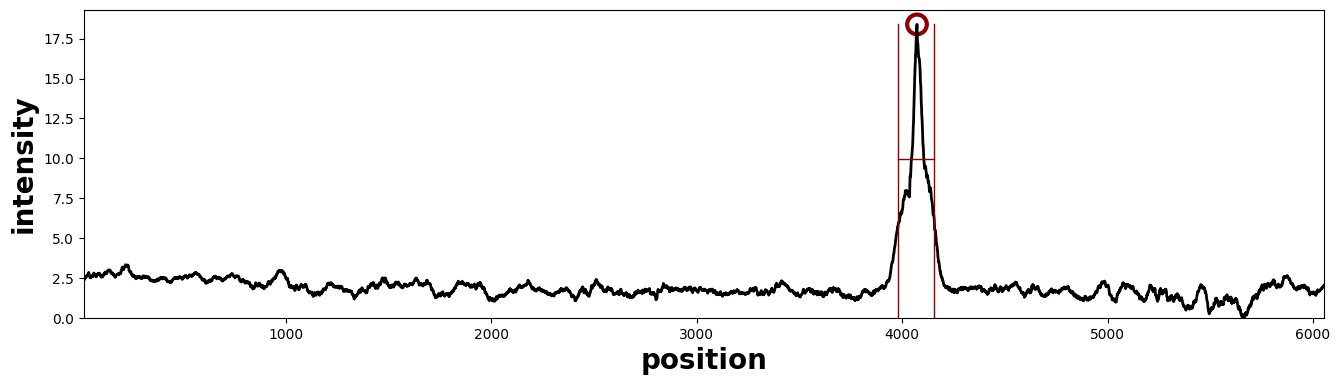

In [23]:
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])
for (pos,minus,plus,delta,height,avg,bgr,sig_to_noise) in peaklist:
    ax.scatter([pos],[height],facecolor="None",edgecolor='darkred',s=200,lw=3,alpha=1)
    ax.plot([minus,plus],[avg,avg],color='darkred',lw=1,alpha=1)
    ax.plot([minus,minus],[0,height],color='darkred',lw=1,alpha=1)
    ax.plot([plus,plus],[0,height],color='darkred',lw=1,alpha=1)

# Signal Processing I - 1D Signals - YY1

pos	whm-	whm+	delta	height	avg	bgr	sig_to_noise

39	10	78	68	1.8620834647324669	1.3952059500576635	0.4417507621150003	2.559883763724974

461	331	510	179	1.207847156522653	0.764213152761717	0.170161883738042	2.1839581449171304

5194	5172	5254	82	1.236413329128561	0.925801914691247	0.492247450856722	1.5366596144463553



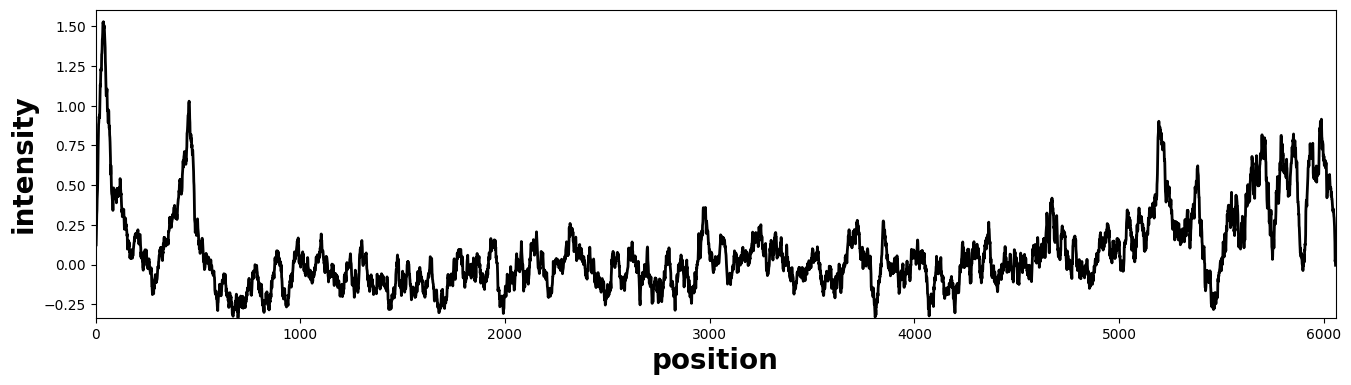

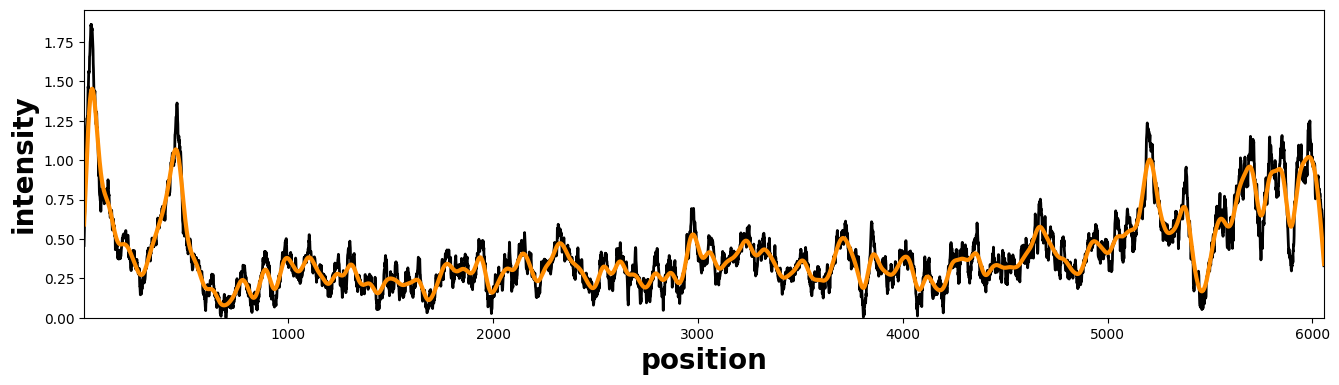

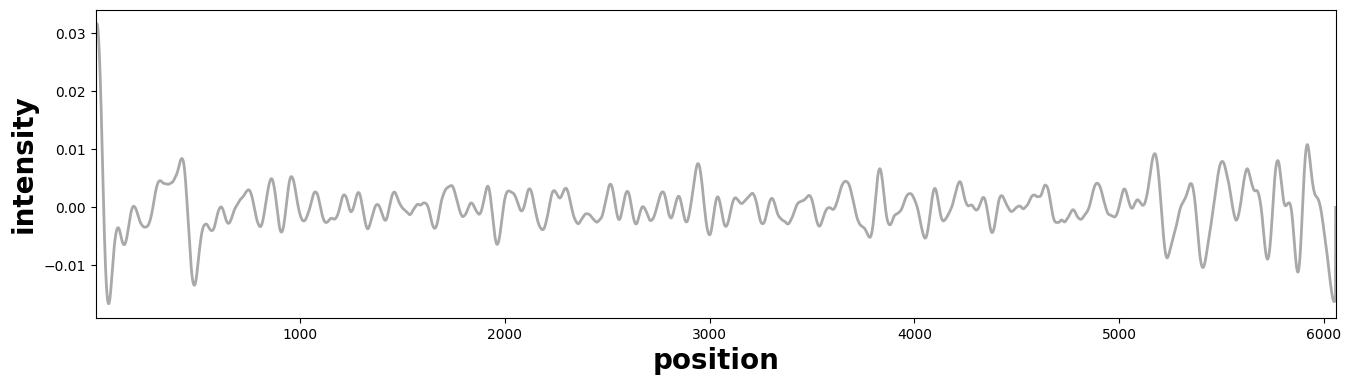

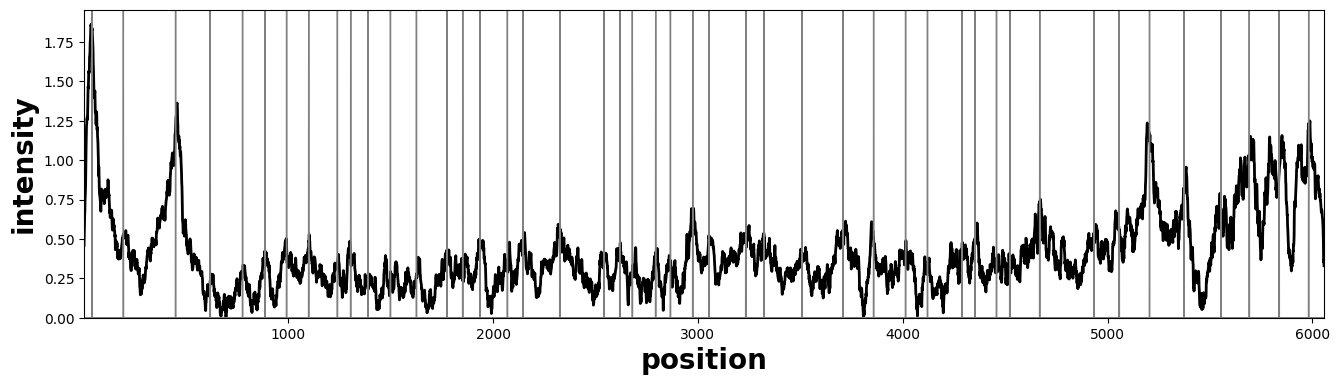

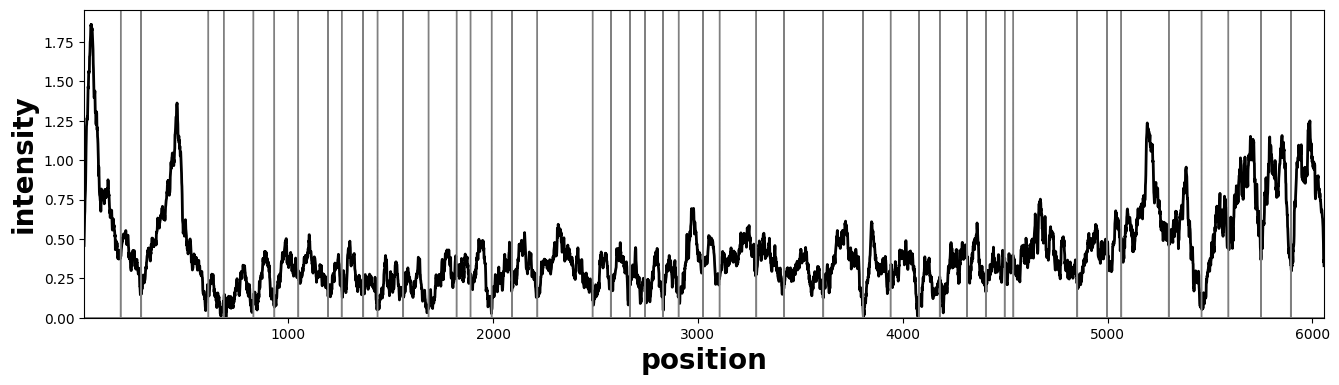

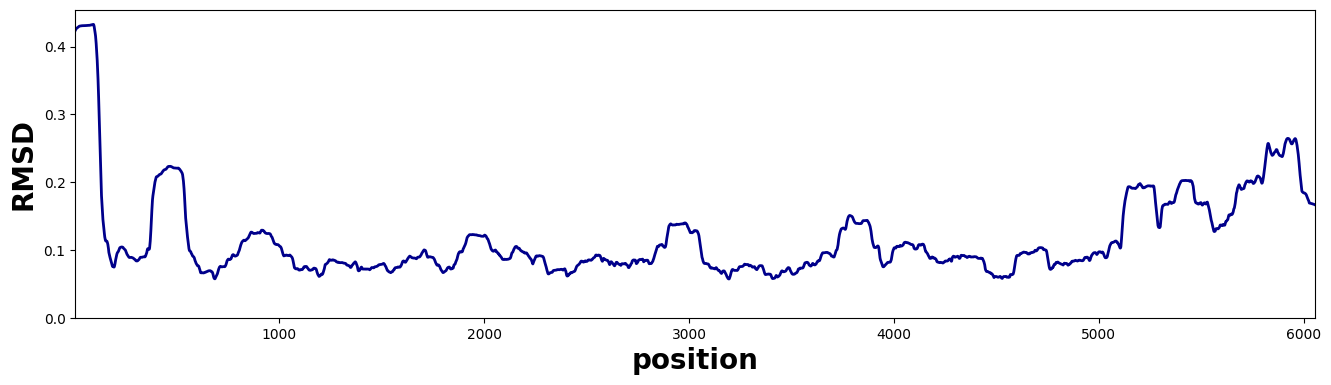

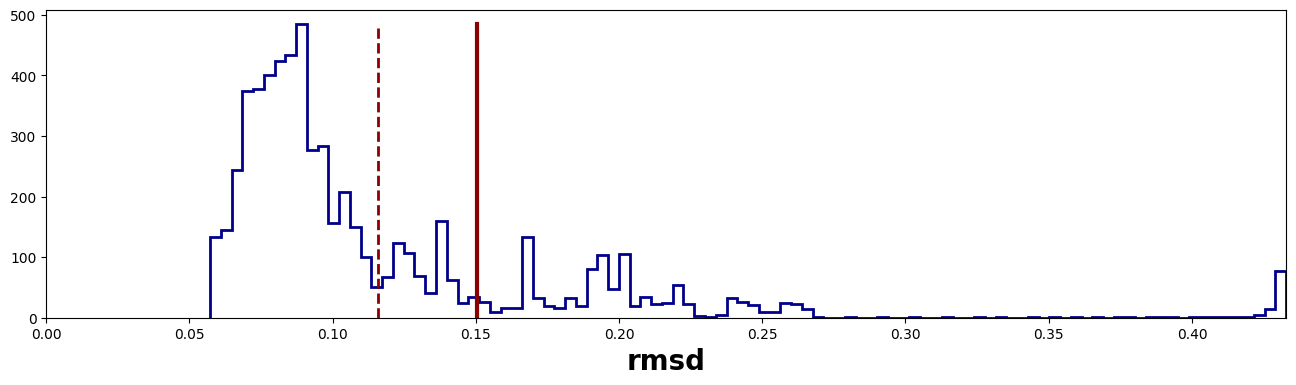

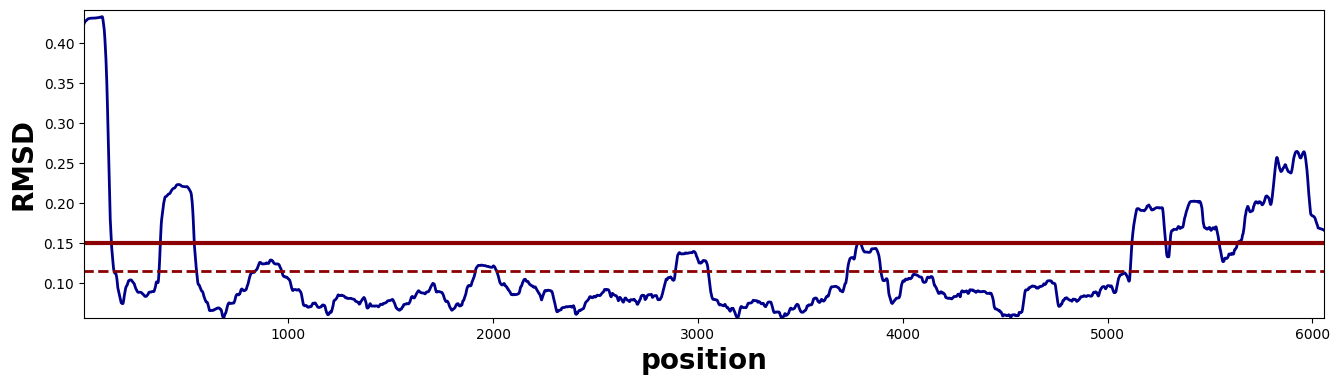

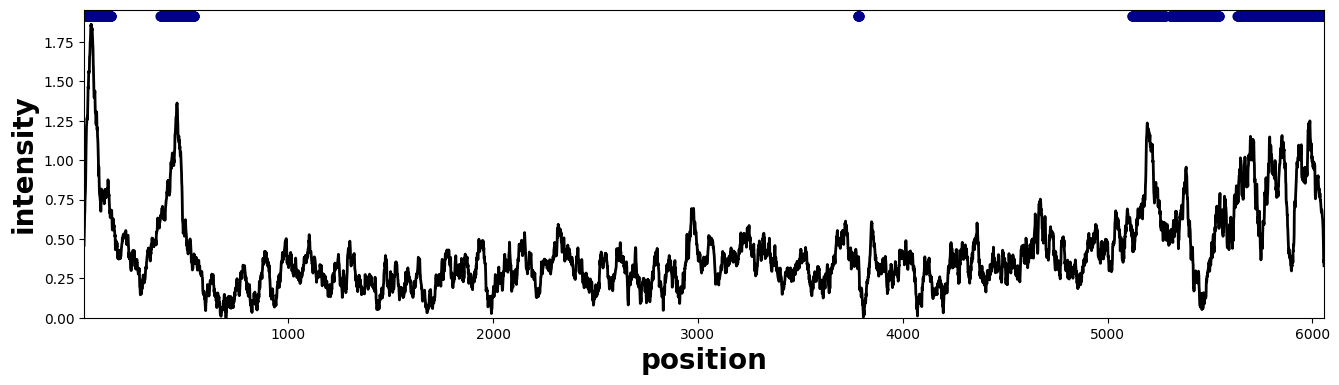

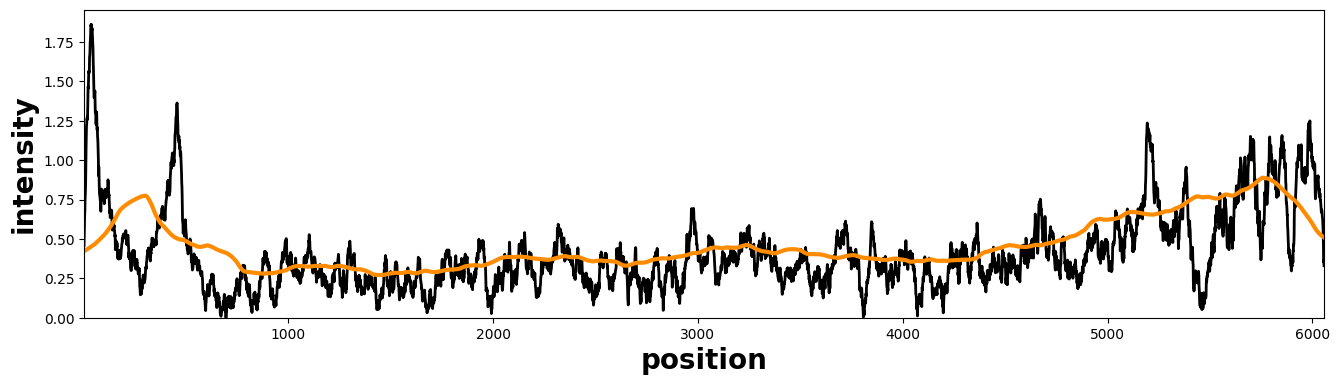

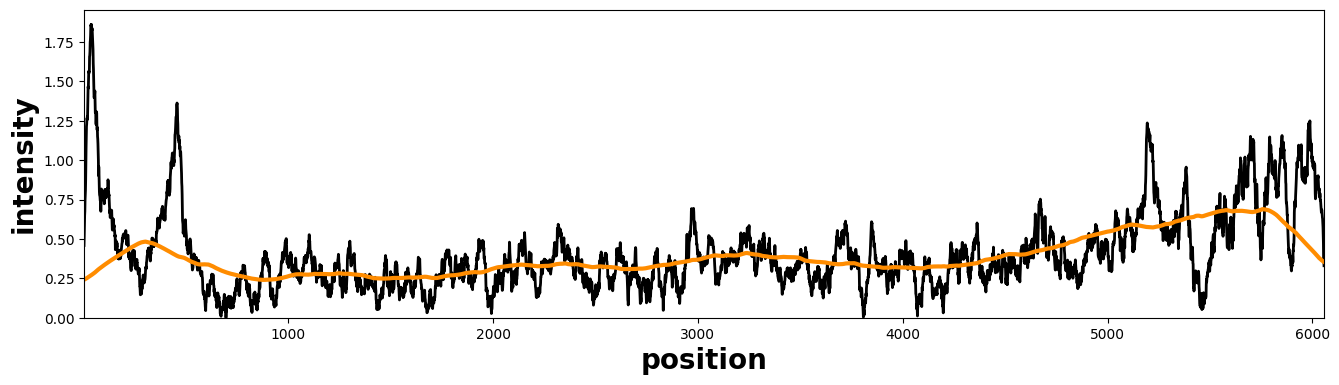

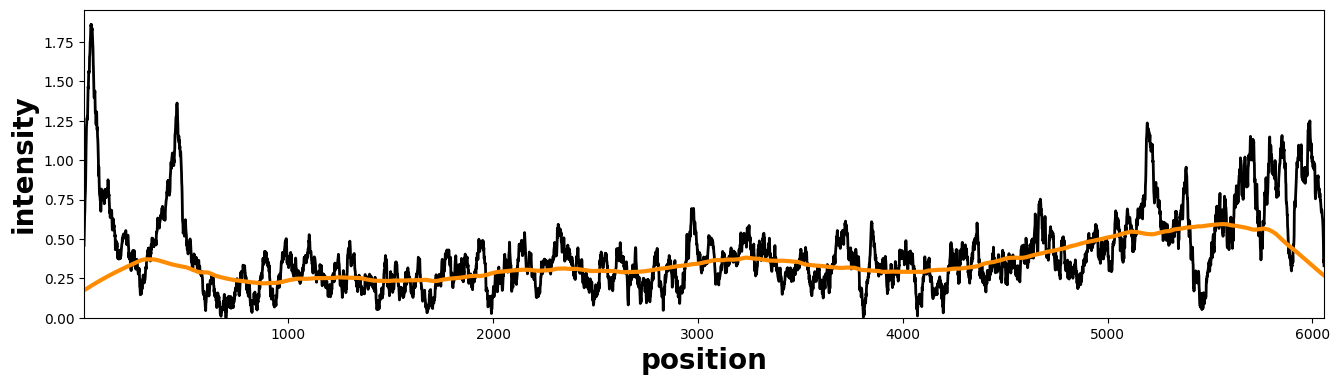

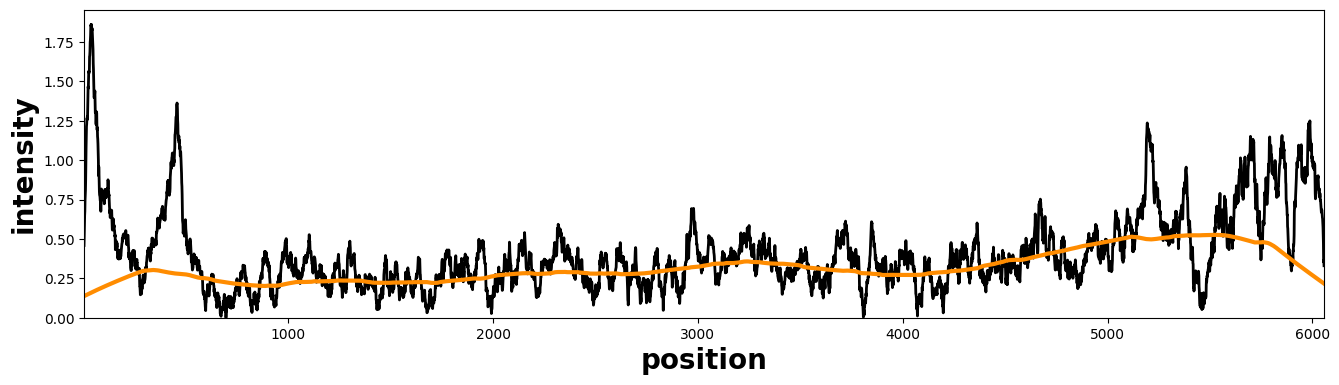

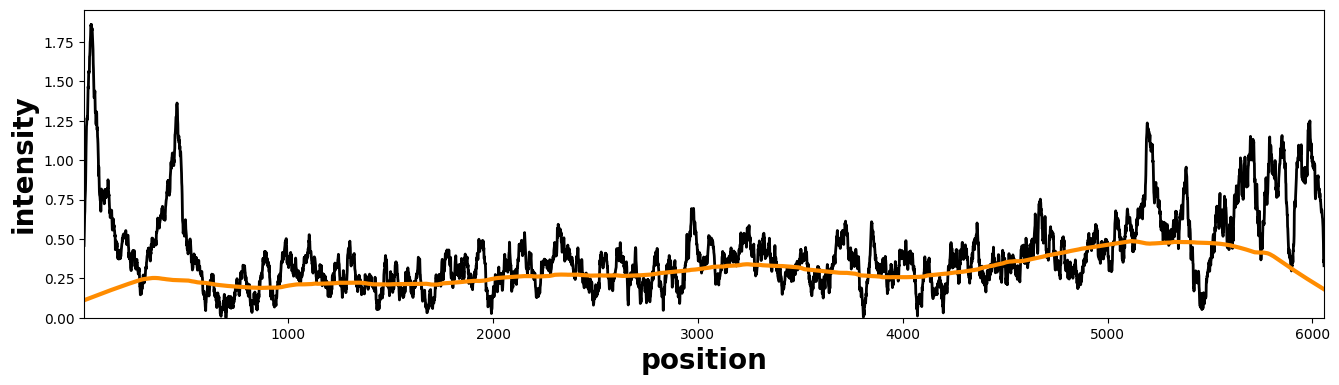

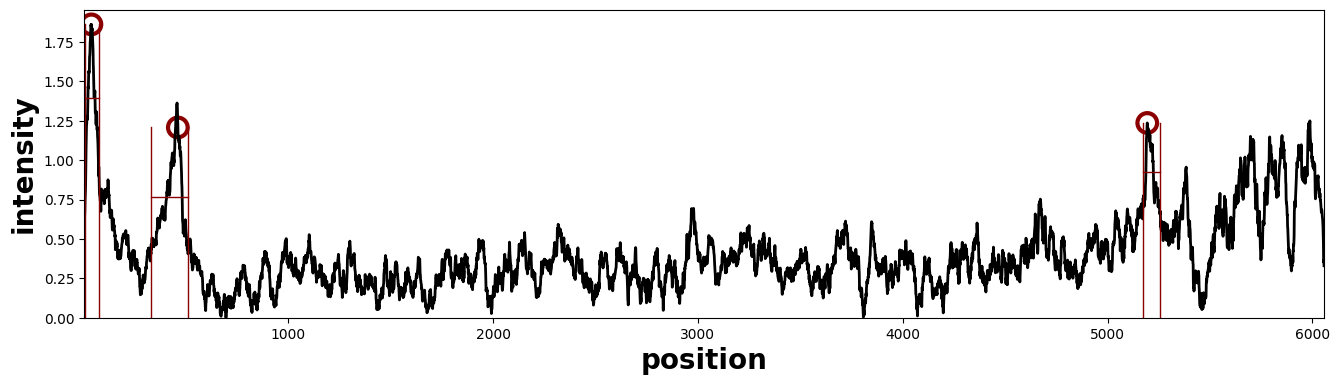

In [25]:
#Read in data and convert to series -- add path to where you copied the data into.
df=pd.read_csv('/content/drive/My Drive/Copy of YY1-human_GM12892_ENCFF951SLF.txt',index_col=0, header=None, sep='\t')
y=df.squeeze('columns') #Represent data as a series
x=y.index #x here represents the index of the original data frame.

fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1) #Setting x as the x-axis and y as the y-axis.
ax.set_xlim([0,np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Center data and smooth over 50 unit windows
y-=np.min(y)
width_smooth=50
w_smooth=np.hanning(2*width_smooth+1)
y_smooth=np.convolve(w_smooth/w_smooth.sum(),y,'same')
y_smooth

fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,y_smooth,color='darkorange',lw=3,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Calculate the difference in smoothed data
y_diff=np.diff(y_smooth)
y_diff=np.append(y_diff,0)

#Plot the rate of change in intensity over windows
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y_diff,color='darkgray',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])

#Find regions in the data where the direction of change shifts

#Initialize a binary array of zeros with the same length as y_diff and set values to 1 where y_diff is positive
y_diff_bin=np.zeros(len(y_diff))
y_diff_bin[y_diff>0]=1
y_diff_bin_diff=np.diff(y_diff_bin)

#Detect transitions in direction - first by calculating discrete differences and then separate upward and downward shifts
y_diff_bin_diff=np.append(y_diff_bin_diff,0)
y_diff_bin_diff_max=y_diff_bin_diff.copy()
y_diff_bin_diff_min=y_diff_bin_diff.copy()
y_diff_bin_diff_max[y_diff_bin_diff>0]=0
y_diff_bin_diff_min[y_diff_bin_diff<0]=0

#Plot markers for the start of decreases
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,(-y_diff_bin_diff_max)*1.05*(np.max(y)-np.min(y))+np.min(y),color='gray',lw=1,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Plot markers for the start of increases
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.plot(x,(y_diff_bin_diff_min)*1.05*(np.max(y)-np.min(y))+np.min(y),color='gray',lw=1,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Calculate and plot the root mean square deviation (RMSD) to assess variability around the smoothed average.
width_rmsd=80 #Define the window width for calculating RMSD
w_rmsd=np.ones(2*width_rmsd+1,'d') #Create a flat (uniform) window of weights
y_avg=np.convolve(w_rmsd/w_rmsd.sum(),y,'same') #Compute the moving average of y

#Calculate the mean square deviation (MSD)
y_sd=(y-y_avg)**2
y_msd=np.convolve(w_rmsd/w_rmsd.sum(),y_sd,'same')
y_rmsd=y_msd**0.5

#Plot the RMSD
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('RMSD',fontsize=20, fontweight='bold')
ax.plot(x,y_rmsd,color='darkblue',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([0,1.05*np.max(y_rmsd)])

#Identify and highlight significant peaks or areas of variability
#Define threshold for RMSD
rmsd_th=1.3

#Plot Histogram of RMSD Values
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('rmsd',fontsize=20, fontweight='bold')
n, bins, patches = ax.hist(y_rmsd,color='darkblue',bins=100,lw=2,alpha=1,histtype='step')
ax.set_xlim([0,np.max(bins)])
max_val=np.max(n)
th=0.2
th_=0.1
th_i=0
max_i=len(n)
done=0

#Find the RMSD level threshold
for i in range(len(n)):
  if done==0:
    if max_val==n[i]:
      max_i=i
    if i>max_i:
      if max_val*th_>n[i]:
        done=1
    if max_val*th<n[i]:
      th_i=i+1

#Calculate and plot the RMSD Level
rmsd_level=bins[th_i]
rmsd_mean=np.mean(y_rmsd[y_rmsd<=rmsd_level])
rmsd_std=np.std(y_rmsd[y_rmsd<=rmsd_level])
rmsd_level=rmsd_mean+rmsd_std*(-2*np.log(th))**0.5
ax.plot([rmsd_level,rmsd_level],[0,max_val],color='darkred',lw=2,ls='--',alpha=1)
ax.plot([rmsd_level*rmsd_th,rmsd_level*rmsd_th],[0,max_val],color='darkred',lw=3,alpha=1)

#Plot RMSD with threshold lines
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('RMSD',fontsize=20, fontweight='bold')
ax.plot(x,y_rmsd,color='darkblue',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y_rmsd),1.02*np.max(y_rmsd)])
ax.plot([0,np.max(x)],[rmsd_level,rmsd_level],color='darkred',lw=2,ls='--',alpha=1)
ax.plot([0,np.max(x)],[rmsd_level*rmsd_th,rmsd_level*rmsd_th],color='darkred',lw=3,alpha=1)

#Highlight regions with high RMSD in the original plot
fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.scatter(x[y_rmsd>=rmsd_level*rmsd_th],np.ones(len(x[y_rmsd>=rmsd_level*rmsd_th]))*1.03*np.max(y),color='darkblue',s=40,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])

#Define background smoothing parameters
width_bgr=300
w_bgr=np.ones(2*width_bgr+1,'d')
th_bgr=1.2
y1 = y.copy()

#Iterative smoothing and background adjustment and plotting
for j in range(5):
  y_bgr=np.convolve(w_bgr/w_bgr.sum(),y1,'same')
  y1 = y.copy()
  y1[y1>th_bgr*y_bgr]=y_bgr[y1>th_bgr*y_bgr]

  fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
  ax.set_xlabel('position',fontsize=20, fontweight='bold')
  ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
  ax.plot(x,y,color='black',lw=2,alpha=1)
  ax.plot(x,th_bgr*y_bgr,color='darkorange',lw=3,alpha=1)
  ax.set_xlim([np.min(x),np.max(x)])
  ax.set_ylim([np.min(y),1.05*np.max(y)])

#Final background level adjustment
y_bgr = th_bgr*y_bgr

#Identify peaks
#Initialization - set peak width threshold and initialize a list to store peaks
peak_width_threshold=0.25
peaklist=[]

#Loop through all data points
for i in range(len(x)):
	i_=i
	if y_diff_bin_diff[i]==-1:
		peak_pos=x[i]
		peak_height=y[x[i]]
		signal_to_noise=0
		done=0

		#Determine left and right boundaries of the peak
		for j in range(width_rmsd):
			if i-j>=0:
				if y[x[i-j]]<peak_height/2.0:
					done=1
				if y_diff_bin_diff[i-j]==1:
					done=1
				if done==0:
					if peak_height<y[x[i-j]]:
						peak_height=y[x[i-j]]
						peak_pos=x[i-j]
						i_=i-j
		done=0
		for j in range(width_rmsd):
			if i+j<len(x):
				if y[x[i+j]]<peak_height/2.0:
					done=1
				if y_diff_bin_diff[i+j]==1:
					done=1
				if done==0:
					if peak_height<y[x[i+j]]:
						peak_height==y[x[i+j]]
						peak_pos=x[i+j]
						i_=i+j
		i_min_minus=0
		done=0
		for j in range(width_rmsd*5):
			if i_-j>=0:
				if y_diff_bin_diff[i_-j]==1:
					done=1
				if done==0:
					i_min_minus=j
		i_min_plus=0
		done=0
		for j in range(width_rmsd*5):
			if i_+j<len(x):
				if y_diff_bin_diff[i_+j]==1:
					done=1
				if done==0:
					i_min_plus=j

		#Compute local background (Baseline)
		local_bgr=(y[x[i_-i_min_minus]]+y[x[i_+i_min_plus]])/2.0
		peak_minus=-1
		i_peak_minus=0
		done=0
		for j in range(i_min_minus):
			if i_-j>=0:
				if (y[x[i_-j]]-local_bgr)<(peak_height-local_bgr)*peak_width_threshold:
					done=1
				if done==0:
					peak_minus=x[i_-j]
					i_peak_minus=j
		peak_plus=-1
		i_peak_plus=0
		done=0
		for j in range(i_min_plus):
			if i_+j<len(x):
				if (y[x[i_+j]]-local_bgr)<(peak_height-local_bgr)*peak_width_threshold:
					done=1
				if done==0:
					peak_plus=x[i_+j]
					i_peak_plus=j
		avg=y[x[i_]]
		avg_count=1
		for j in range(i_peak_minus):
			if i_-1-j>=0:
				avg+=y[x[i_-1-j]]
				avg_count+=1
		for j in range(i_peak_plus):
			if i_+1+j<len(x):
				avg+=y[x[i_+1+j]]
				avg_count+=1
		avg/=avg_count
		rmsd=(y[x[i_]]-avg)**2
		rmsd_count=1
		for j in range(i_peak_minus):
			if i_-1-j>=0:
				rmsd+=(y[x[i_-1-j]]-avg)**2
				rmsd_count+=1
		for j in range(i_peak_plus):
			if i_+1+j<len(x):
				rmsd+=(y[x[i_+1+j]]-avg)**2
				rmsd_count+=1
		rmsd/=rmsd_count
		rmsd=rmsd**0.5
		signal_to_noise=rmsd/rmsd_level
		if signal_to_noise>rmsd_th and peak_height>y_bgr[np.where(x == peak_pos)]:
			peaklist.append((peak_pos,peak_minus,peak_plus,peak_plus-peak_minus,peak_height,avg,local_bgr,signal_to_noise))
print('pos\twhm-\twhm+\tdelta\theight\tavg\tbgr\tsig_to_noise\n')
for (pos,minus,plus,delta,height,avg,bgr,sig_to_noise) in peaklist:
	print(str(pos)+'\t'+str(minus)+'\t'+str(plus)+'\t'+str(delta)+'\t'+str(height)+'\t'+str(avg)+'\t'+str(bgr)+'\t'+str(sig_to_noise)+'\n')

fig,ax = plt.subplots(1,1,figsize=(16,4), sharex=True, sharey=False)
ax.set_xlabel('position',fontsize=20, fontweight='bold')
ax.set_ylabel('intensity',fontsize=20, fontweight='bold')
ax.plot(x,y,color='black',lw=2,alpha=1)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_ylim([np.min(y),1.05*np.max(y)])
for (pos,minus,plus,delta,height,avg,bgr,sig_to_noise) in peaklist:
    ax.scatter([pos],[height],facecolor="None",edgecolor='darkred',s=200,lw=3,alpha=1)
    ax.plot([minus,plus],[avg,avg],color='darkred',lw=1,alpha=1)
    ax.plot([minus,minus],[0,height],color='darkred',lw=1,alpha=1)
    ax.plot([plus,plus],[0,height],color='darkred',lw=1,alpha=1)

# Signal Processing I - 1D Signals Homework

We have two additional datasets describing MYC in two cell lines - K562 and MCF7.  
Identify and plot peaks next to each other.
Answer the following questions:
1. What are the peak locations? Do you identify peaks in the same position across cell lines?  
2. Are the number of peaks the same?  
3. What are the background adjustments needed for each sample?
  
MYC-human_K562_ENCFF000YLA.txt  
MYC-human_MCF-7_ENCFF000RZJ.txt

In [30]:
#Read in data and convert to series
k562=pd.read_csv('/content/drive/My Drive/Copy of MYC-human_K562_ENCFF000YLA.txt',index_col=0, header=None, sep='\t')
k562_y=k562.squeeze('columns') #Represent data as a series
k562_x=k562_y.index #k562_x here represents the index of the original data frame.

In [31]:
#Read in data and convert to series
MCF=pd.read_csv('/content/drive/My Drive/Copy of MYC-human_MCF-7_ENCFF000RZJ.txt',index_col=0, header=None, sep='\t')
MCF_y=MCF.squeeze('columns') #Represent data as a series
MCF_x=MCF_y.index #MCF_x here represents the index of the original data frame.

K562 Number of peaks: 138
MCF-7 Number of peaks: 101
Number of common peak positions: 0
Common peak positions between K562 and MCF-7: []


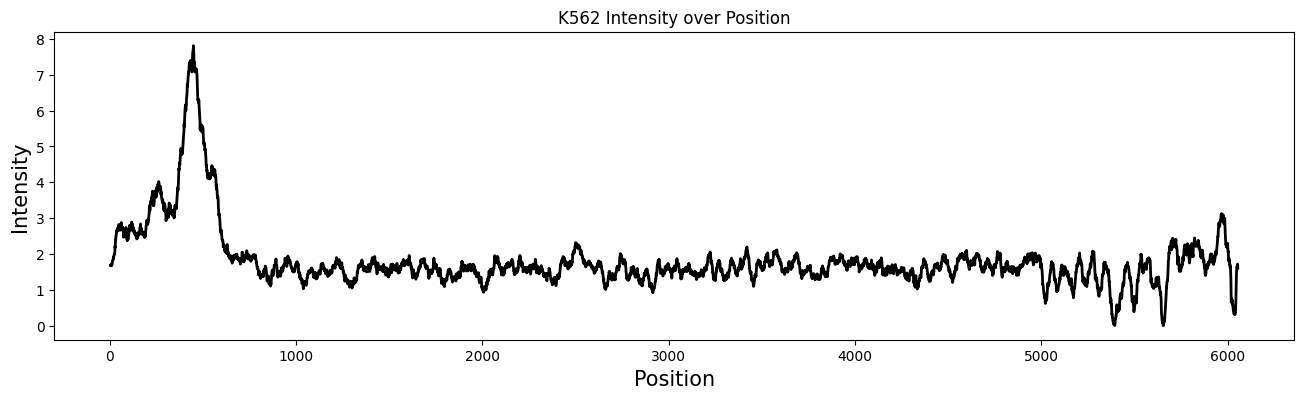

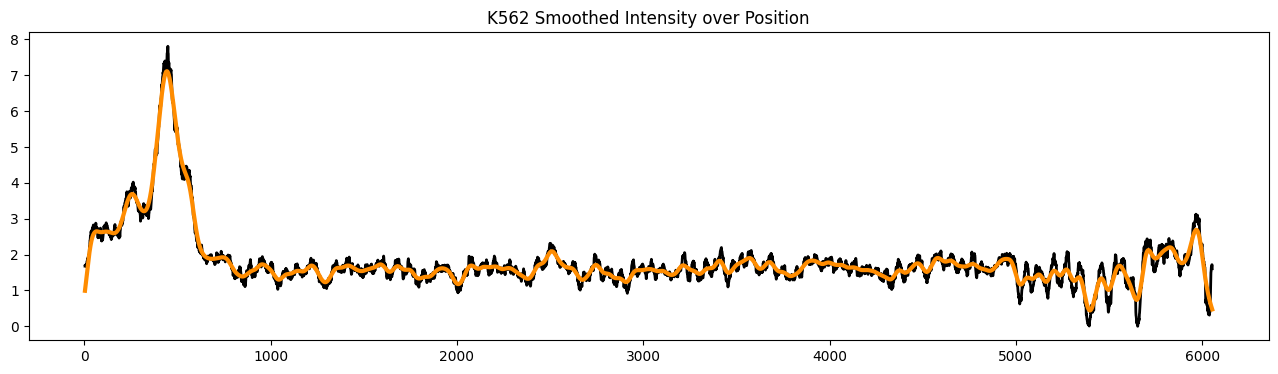

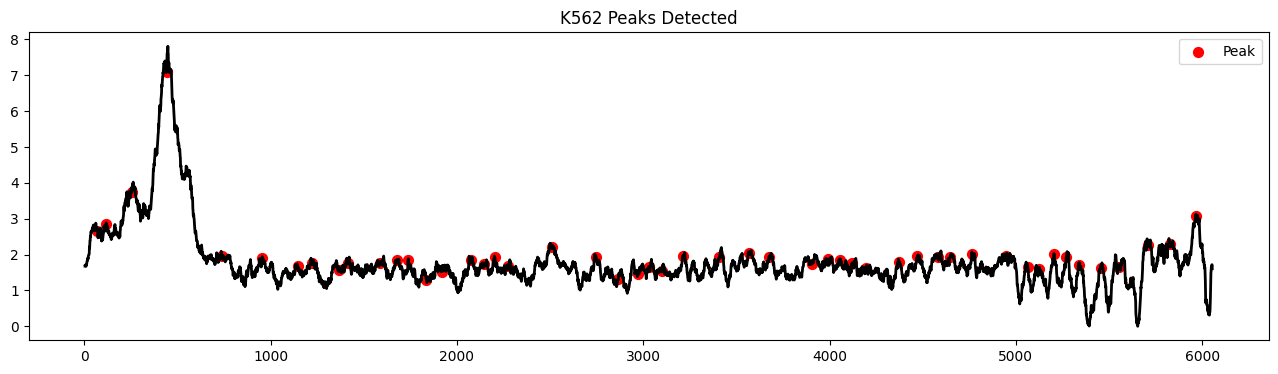

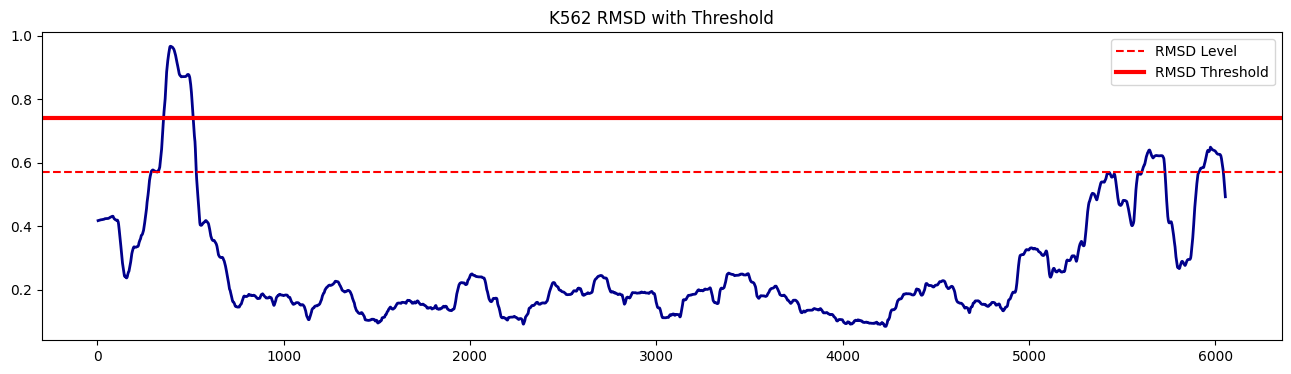

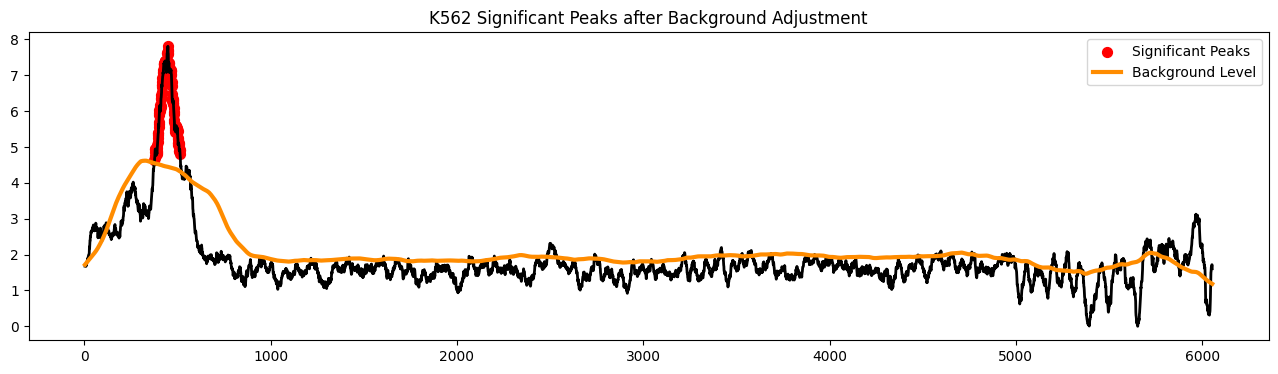

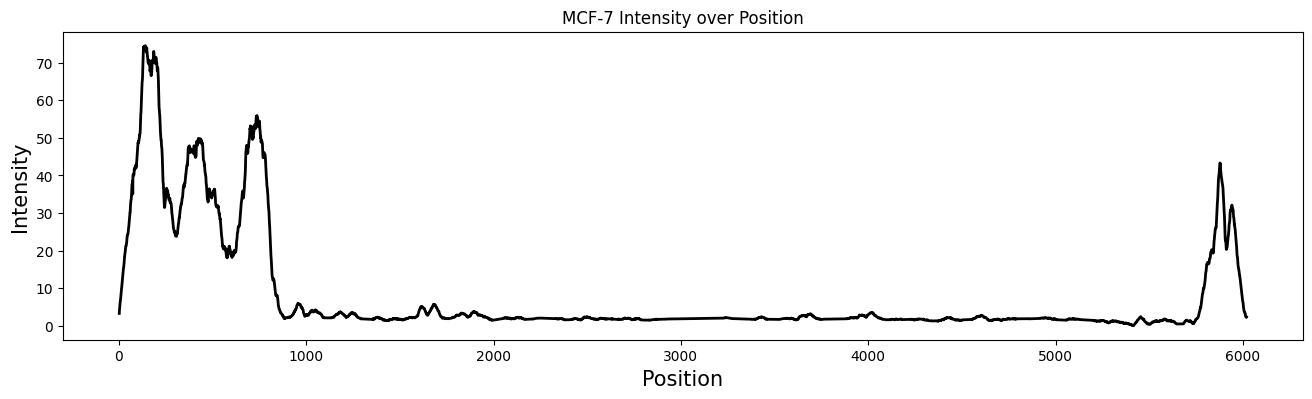

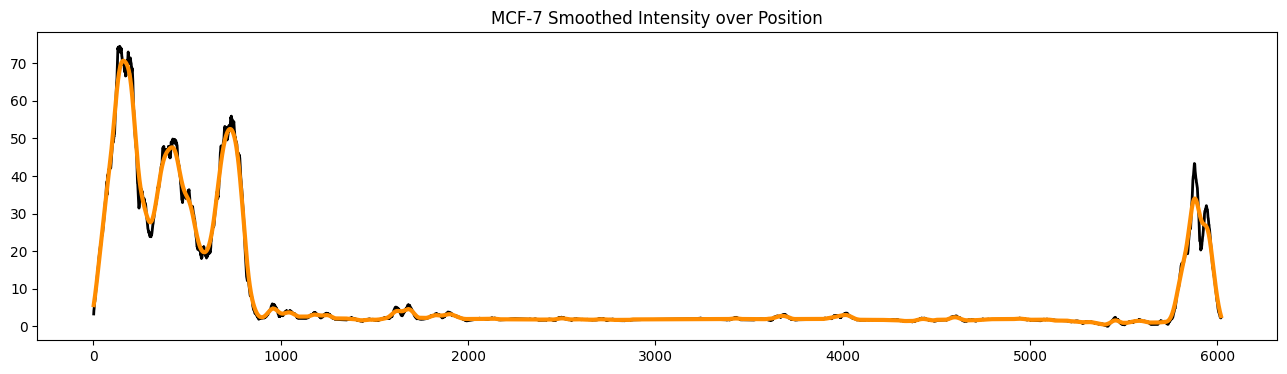

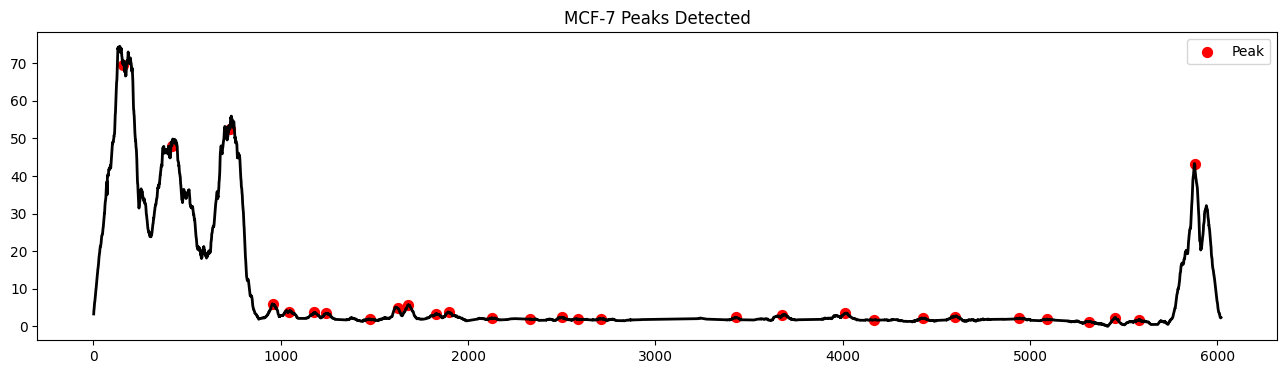

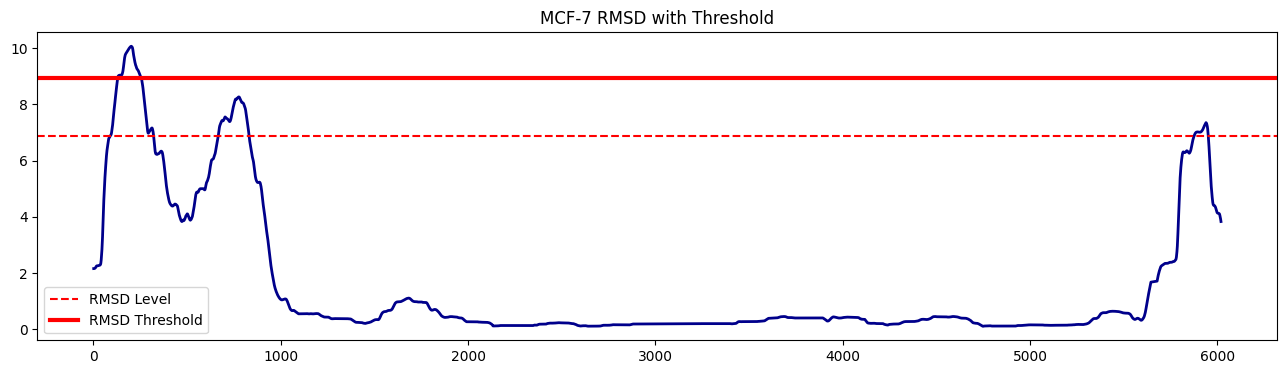

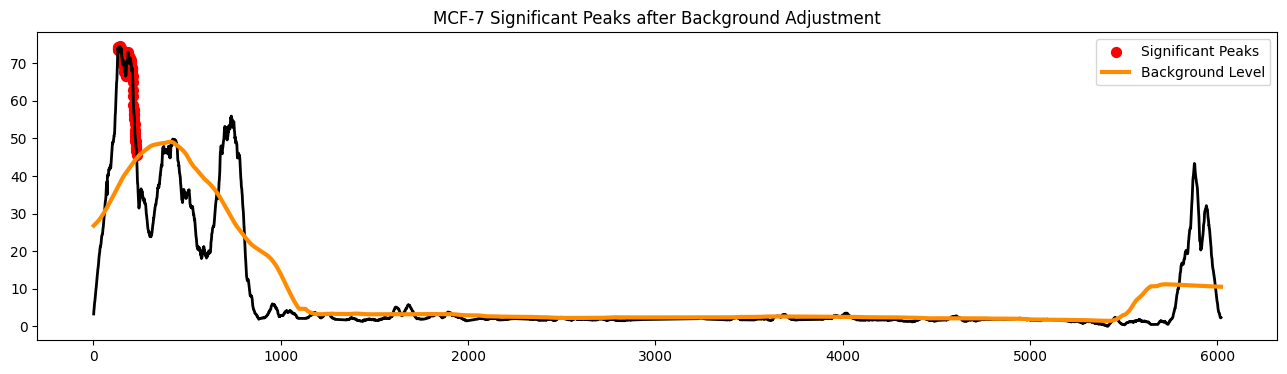

In [40]:
# Define function for smoothing, peak detection, and background adjustment
def analyze_peaks(x, y, cell_line_name):
    # Plot initial intensity
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x, y, color='black', lw=2)
    ax.set_title(f'{cell_line_name} Intensity over Position')
    ax.set_xlabel('Position', fontsize=15)
    ax.set_ylabel('Intensity', fontsize=15)

    # Smooth data over a 50-unit window
    y -= np.min(y)  # Center data
    width_smooth = 50
    w_smooth = np.hanning(2 * width_smooth + 1)
    y_smooth = np.convolve(w_smooth / w_smooth.sum(), y, 'same')

    # Plot smoothed data
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x, y, color='black', lw=2)
    ax.plot(x, y_smooth, color='darkorange', lw=3)
    ax.set_title(f'{cell_line_name} Smoothed Intensity over Position')

    # Detect peaks using change in direction
    y_diff = np.diff(y_smooth)
    y_diff = np.append(y_diff, 0)
    y_diff_bin = np.zeros(len(y_diff))
    y_diff_bin[y_diff > 0] = 1
    y_diff_bin_diff = np.diff(y_diff_bin)
    y_diff_bin_diff = np.append(y_diff_bin_diff, 0)

    # Plot peaks
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x, y, color='black', lw=2)

    # Identify peak indices where slope changes from positive to negative
    peak_indices = np.where(y_diff_bin_diff == -1)[0]
    ax.scatter(x[peak_indices], y.iloc[peak_indices], color='red', s=50, label='Peak')
    ax.set_title(f'{cell_line_name} Peaks Detected')
    ax.legend()

    # RMSD calculation for background adjustment
    width_rmsd = 80
    w_rmsd = np.ones(2 * width_rmsd + 1)
    y_avg = np.convolve(w_rmsd / w_rmsd.sum(), y, 'same')
    y_sd = (y - y_avg) ** 2
    y_msd = np.convolve(w_rmsd / w_rmsd.sum(), y_sd, 'same')
    y_rmsd = np.sqrt(y_msd)

    rmsd_th = 1.3
    rmsd_level = np.mean(y_rmsd) + np.std(y_rmsd) * (-2 * np.log(0.2)) ** 0.5

    # Plot RMSD with threshold lines
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x, y_rmsd, color='darkblue', lw=2)
    ax.axhline(y=rmsd_level, color='red', linestyle='--', label='RMSD Level')
    ax.axhline(y=rmsd_level * rmsd_th, color='red', lw=3, label='RMSD Threshold')
    ax.legend()
    ax.set_title(f'{cell_line_name} RMSD with Threshold')

    # Background adjustment
    width_bgr = 300
    w_bgr = np.ones(2 * width_bgr + 1)
    th_bgr = 1.2
    y_bgr = np.convolve(w_bgr / w_bgr.sum(), y, 'same') * th_bgr

    # Highlight significant peaks
    peak_indices = np.where((y > y_bgr) & (y_rmsd >= rmsd_level * rmsd_th))[0]
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x, y, color='black', lw=2)
    ax.scatter(x[peak_indices], y.iloc[peak_indices], color='red', s=50, label='Significant Peaks')
    ax.plot(x, y_bgr, color='darkorange', lw=3, label='Background Level')
    ax.legend()
    ax.set_title(f'{cell_line_name} Significant Peaks after Background Adjustment')

    # Return peak positions and count
    peak_positions = x[peak_indices]
    print(f"{cell_line_name} Number of peaks: {len(peak_indices)}")
    return peak_positions, len(peak_indices)

# Analyze peaks for K562 and MCF-7
k562_peak_positions, k562_peak_count = analyze_peaks(k562_x, k562_y, "K562")
MCF_peak_positions, MCF_peak_count = analyze_peaks(MCF_x, MCF_y, "MCF-7")

# Compare peak positions across cell lines
common_peaks = np.intersect1d(k562_peak_positions, MCF_peak_positions)
print(f"Number of common peak positions: {len(common_peaks)}")
print("Common peak positions between K562 and MCF-7:", common_peaks)

1. It looks like there are some peak overlaps between positions 300-900 and 5900-6000 with different levels of intensity but after taking a closer look, there are no exact overlaps.

2. It appears the K562 cell line has 138 peaks while the MCF-7 has only 101.

3. Each sample's background are filtered out by the following methods: smoothing data over a 50-unit window, root mean squared deviation, and broad background level over larger window calculations. It is important to find significant/relevant peaks and not to over minimize true peaks or over maximize false positive peaks.
